Problem 1: Finding the Optimal k and Bootstrap Iterations

In this task, you will use the K-Nearest Neighbors (KNN) classifier to classify handwritten digits from the
MNIST dataset. The goal is to determine:

1. The optimal number of neighbors (k) for the KNN classifier.
2. The optimal number of bootstrap iterations to obtain a confident estimate of the model's accuracy.

Steps to Follow:

1. Preprocess the MNIST dataset:
  - Normalize the pixel values (e.g., divide by 255 to scale between
0 and 1) and select a random 10% subset of the dataset.
2. KNN Classifier:
  - Use the KNeighborsClassifier from sklearn.neighbors. Iterate over different
values of k, specifically k = 1, 2, . . . , 10.
3. Bootstrap Resampling:
  - For each value of k, perform several bootstrap iterations:
    - Resample the entire dataset with replacement to create a training set.
    - Train the KNN model on the resampled data.
    - Test the model on the remaining data points (out-of-bag data).
    - Compute and store the accuracy on the out-of-bag data for each iteration.
4. Determine Optimal k and Bootstrap Iterations:
  - Experiment with different numbers of bootstrap iterations (e.g., try 1, 2, 11, 22, 44, 88, etc.).
  - Calculate the mean accuracy across bootstrap iterations for each k.
  - Determine the optimal k and the number of iterations required for a stable estimate.
5. Plot:
  - Plot the mean accuracy for each value of k.
  - Include another plot showing how the mean accuracy stabilizes with increasing bootstrap iterations.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

np.random.seed(107)

train_size, test_size = 600, 100

train_indices = np.random.choice(len(x_train), size=train_size, replace=False)
test_indices = np.random.choice(len(x_test), size=test_size, replace=False)

x_train = x_train[train_indices].reshape((train_size, 28*28)).astype("float32") / 255.
y_train = y_train[train_indices]

x_test = x_test[test_indices].reshape((test_size, 28*28)).astype("float32") / 255.
y_test = y_test[test_indices]


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from concurrent.futures import ThreadPoolExecutor, as_completed


def bootstrap_knn(X, Y, k, repeat):
    oob_accuracies = []
    for _ in range(repeat):
        indices = np.random.choice(len(X), size=len(X), replace=True)
        x_in, y_in = X[indices], Y[indices]
        oob_indices = np.setdiff1d(np.arange(len(X)), indices)
        x_out, y_out = X[oob_indices], Y[oob_indices]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_in, y_in)
        y_pred = knn.predict(x_out)
        oob_accuracies.append(metrics.accuracy_score(y_out, y_pred))

    return np.mean(oob_accuracies)


In [ ]:
k_values = range(1, 11)
bootstrap_values = [1, 2, 11, 22, 44, 88]
mean_accuracies = {k: [] for k in k_values}

for k in k_values:
    for b in bootstrap_values:
        mean_accuracies[k].append(bootstrap_knn(x_train, y_train, k, b))

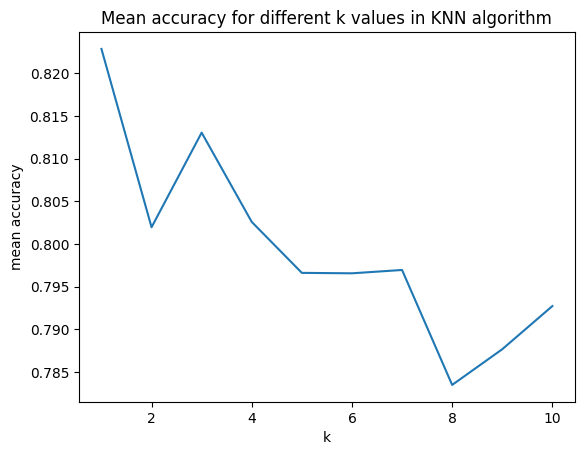

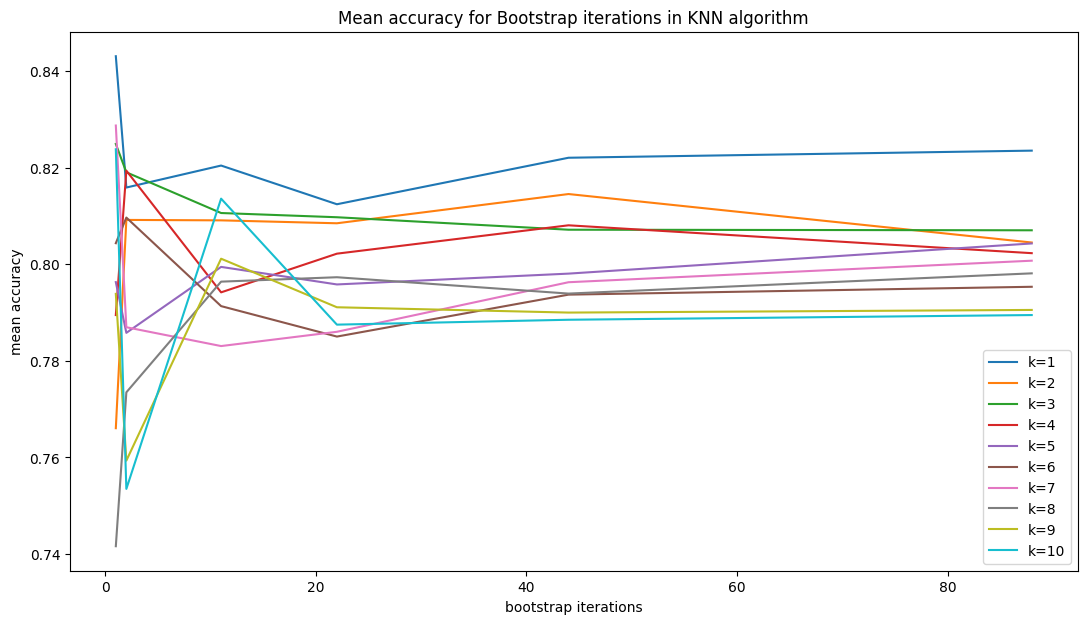

In [ ]:
accuracies_k = [np.mean(mean_accuracies[k]) for k in k_values]
plt.figure()
plt.plot(k_values, accuracies_k)
plt.xlabel('k')
plt.ylabel('mean accuracy')
plt.title('Mean accuracy for different k values in KNN algorithm')
plt.show()

print()

plt.figure(figsize=(13, 7))
for k in k_values:
    plt.plot(bootstrap_values, mean_accuracies[k], label=f'k={k}')
plt.xlabel('bootstrap iterations')
plt.ylabel('mean accuracy')
plt.legend()
plt.title('Mean accuracy for Bootstrap iterations in KNN algorithm')
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.84
